In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
# 데이터셋 로드

df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# 정규화 (표준화)

features = df.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
#  모델 학습 및 레이블 부여

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [16]:
# 클러스터별 품질 평균

cluster_means = df.groupby('cluster').mean()
cluster_means[['quality']]

,quality
cluster,
0,5.552632
1,5.960159
2,5.362667


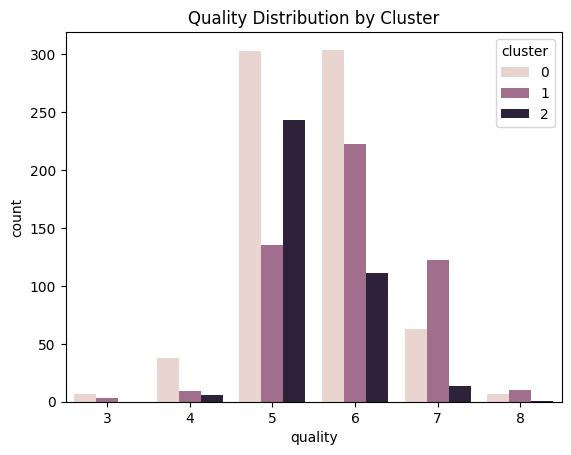

In [20]:
# 품질 분포 차트!!

sns.countplot(data=df, x='quality', hue='cluster')
plt.title('Quality Distribution by Cluster')
plt.show()

In [33]:
# PCA 차원 축소

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df['pca1'] = pca_features[:, 0]
df['pca2'] = pca_features[:, 1]

In [ ]:
# KMeans 중심점을 PCA 공간으로 변환

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

In [ ]:
# 라벨 이름 매핑 정의

cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}

# 새로운 열로 라벨 이름 저장
df['cluster_name'] = df['cluster'].map(cluster_names)

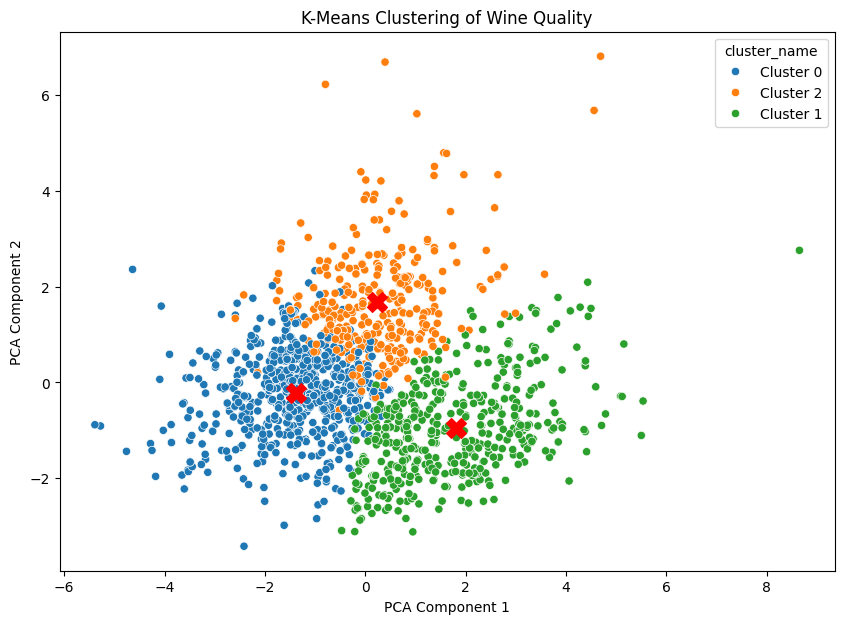

In [51]:
# 시각화

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='cluster_name',
    data=df,
)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1], 
    marker='X',
    s=200,
    c='red',
    label='Centroids',
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Wine Quality')
plt.show()